In [4]:
import numpy as np
import matplotlib.pyplot as plt
import nnfs
from nnfs.datasets import vertical_data
nnfs.init()

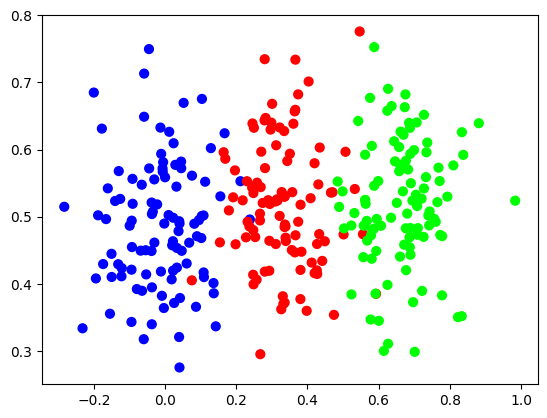

In [3]:
X, y = vertical_data(samples=100, classes=3)
plt.scatter(X[:,0], X[:,1], c=y, s=40, cmap='brg')
plt.show()

In [7]:
class Layer_Dense:
    def __init__(self, n_inputs, n_neurons):
        self.weights = np.random.rand(n_inputs,n_neurons)
        self.biases = np.zeros((1, n_neurons))

    def forward(self, inputs):
        self.output = np.dot(inputs, self.weights) + self.biases

In [12]:
# ReLU activation
class Activation_ReLU:
    # Calculate output values from inputs
    def forward(self, inputs):
        self.output = np.maximum(0, inputs)


In [13]:
# Softmax activation
class Activation_Softmax:
    # forward pass 
    def forward(self, inputs):
        # Get unnormalized probabilities
        exp_values = np.exp(inputs - np.max(inputs, axis=1, keepdims=True))
        # Normalize them for each sample
        probabilities = exp_values/np.sum(exp_values, axis=1, keepdims=True)
        self.output = probabilities

# Calculating Network Error with Loss
*The loss function , also referred to as the cost function , is the
algorithm that quantifies how wrong a model is. Loss is the measure of this metric. Since loss is
the model’s error, we ideally want it to be 0.*

# Categorical Cross-Entropy Loss
*If you’re familiar with linear regression, then you already know one of the loss functions used
with neural networks that do regression: squared error (or mean squared error with neural
networks).
We’re not performing regression in this example; we’re classifying, so we need a different loss
function. The model has a softmax activation function for the output layer, which means it’s
outputting a probability distribution. Categorical cross-entropy is explicitly used to compare
a “ground-truth” probability ( y or “ targets ”) and some predicted distribution ( y-hat or
“ predictions ”), so it makes sense to use cross-entropy here. It is also one of the most
commonly used loss functions with a softmax activation on the output layer.*

In [16]:
# Common loss class
class Loss:
    # Calculates the data and regularization losses
    # given model output and ground truth values
    def calculate(self, output, y):
        # Calculate sample losses
        sample_losses = self.forward(output, y)
        # Calculate mean loss
        data_loss = np.mean(sample_losses)
    # Return loss
        return data_loss

In [17]:
# Cross-entropy loss
class Loss_CategoricalCrossentropy (Loss):
    # Forward pass
    def forward(self, y_pred, y_true):
        # Number of samples in a batch
        samples = len(y_pred)

        # Clip data to prevent division by 0
        # Clip both sides to not drag mean towards any value
        y_pred_clipped = np.clip(y_pred, 1e-7, 1 - 1e-7)

        # Probabilities for target values -
        # only if categorical labels
        if len(y_true.shape) == 1:
            correct_confidences = y_pred_clipped[
                range(samples),
                y_true
            ]
        # Mask values - only for one-hot encoded labels
        elif len(y_true.shape) == 2:
            correct_confidences = np.sum(
                y_pred_clipped * y_true,
                axis=1
            )

        # Losses
        negative_log_likelihoods = - np.log(correct_confidences)
        return negative_log_likelihoods

In [18]:
# Create Dense layer with 2 input features and 3 output values
dense1 = Layer_Dense(2, 3)
# Create ReLU activation (to be used with Dense layer):
activation1 = Activation_ReLU()

# Create second Dense layer with 3 input features (as we take output
# of previous layer here) and 3 output values (output values)
dense2 = Layer_Dense(3, 3)

# Create Softmax activation (to be used with Dense layer):
activation2 = Activation_Softmax()

# Create loss function
loss_function = Loss_CategoricalCrossentropy()


# Make a forward pass of our training data through this layer
dense1.forward(X)

# Make a forward pass through activation function
# it takes the output of first dense layer here
activation1.forward(dense1.output)

# Make a forward pass through second Dense layer
# it takes outputs of activation function of first layer as inputs
dense2.forward(activation1.output)

# Make a forward pass through activation function
# it takes the output of second dense layer here
activation2.forward(dense2.output)

# Let's see output of the first few samples:
print (activation2.output[: 5 ])


# Perform a forward pass through loss function
# it takes the output of second dense layer here and returns loss
loss = loss_function.calculate(activation2.output, y)
# Print loss value
print ( 'loss:', loss)

[[0.30592784 0.36372843 0.3303437 ]
 [0.30056792 0.36262962 0.33680248]
 [0.29755372 0.37216958 0.33027667]
 [0.28157374 0.38258368 0.33584255]
 [0.28977057 0.38149104 0.3287384 ]]
loss: 1.083486


# Accuracy Calculation
*While loss is a useful metric for optimizing a model, the metric commonly used in practice along
with loss is the accuracy , which describes how often the largest confidence is the correct class
in terms of a fraction. Conveniently, we can reuse existing variable definitions to calculate the
accuracy metric. We will use the argmax values from the softmax outputs and then compare
these to the targets*